# Online Shoppers Intention


  ## 1.   Context:

*   Online shopping in India with its exponential growth is writing a new history in the Indian retail sector estimated to be reaching a revenue of 120 billion (USD) by 2020.
*   As with any other medium online Industry too faces one major problem with customers on the edge – Cart abandoners and window shoppers!




## 2.   Problem Description:


*   Who are my potential customers who has not completed the purchase yet?
*   The data set that contains some aggregated sessionised metrics of online customers who browsed a e-commerce website


*   We would like to know how would you rank the customers with high buying propensity based on their web foot print.
*   This would in turn help a client optimize his marketing/customer care resources to reach out to such customers and make them complete their purchase.







##  Mounting the Google Drive for fetching the data

In [ ]:
# Mounting my G-Drive to this session
from google.colab import drive
drive.mount('/content/drive')

##  Import/Install Dependencies

In [ ]:
# Import multicore TSNE for faster execution
# For moe details please follow the GIT HUB blog: https://github.com/DmitryUlyanov/Multicore-TSNE
!pip install MulticoreTSNE

In [0]:
# Importing Dependencies
%matplotlib inline

# Package to filter warnings
import warnings

warnings.filterwarnings("ignore")
# Import data loading library
import pandas as pd
import pickle

# Import numpy for numerical operations
import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS
from MulticoreTSNE import MulticoreTSNE as mTSNE

# Importing preprossing module
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Packages for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Packages for crossvalidation
from sklearn.model_selection import GridSearchCV

# Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Importing Dependencies
%matplotlib inline

# Package to filter warnings
import warnings
warnings.filterwarnings("ignore")

# Import data loading library
import pandas as pd
import pickle

# Import numpy for numerical operations
import numpy as np

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
#from wordcloud import WordCloud, STOPWORDS
#from MulticoreTSNE import MulticoreTSNE as mTSNE

# Importing preprossing module
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

# Packages for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Packages for crossvalidation
from sklearn.model_selection import GridSearchCV

# Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})
pd.set_option('display.max_columns', None) # To view all the columns of the dataset

In [139]:
# Generic function to create labels over bar plot
def create_label(ax,type_of_label):
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = 0
        # Vertical alignment for positive values
        va = 'bottom'
    
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
    
        # Use Y value as label and format number with two decimal places
        if type_of_label == 'integer':
            y_value = int(y_value)
            label = "{}".format(y_value)
        else:
            label = "{:.2f}".format(y_value)
    
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Function to modify bar width of seaborn plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## Reading and Understanding the data :

In [4]:
cust_data = pd.read_csv('online_shoppers_intention.csv',low_memory=False)
cust_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
cust_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
cust_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
90%,7.000000,227.000000,2.000000,73.900000,74.000000,2904.459143,0.050000,0.100000,19.114139,0.200000,3.000000,4.000000,7.000000,11.000000
95%,9.000000,352.208095,3.000000,199.000000,110.000000,4312.956282,0.149333,0.173714,38.301457,0.600000,3.000000,5.000000,8.000000,13.000000
99%,14.000000,838.704889,6.000000,722.379200,221.000000,8704.271573,0.200000,0.200000,86.108689,1.000000,4.000000,10.000000,9.000000,20.000000


In [7]:
cust_data.shape

(12330, 18)

In [8]:
# Check for NULL values
cust_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Check for unqiue values in each column
cust_data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [20]:
#Drop duplicate rows if any
cust_data = cust_data.drop_duplicates()
cust_data.shape

(12205, 18)

In [21]:
cust_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [24]:
cust_data.Revenue.value_counts()/len(cust_data.index)*100

False    84.367063
True     15.632937
Name: Revenue, dtype: float64

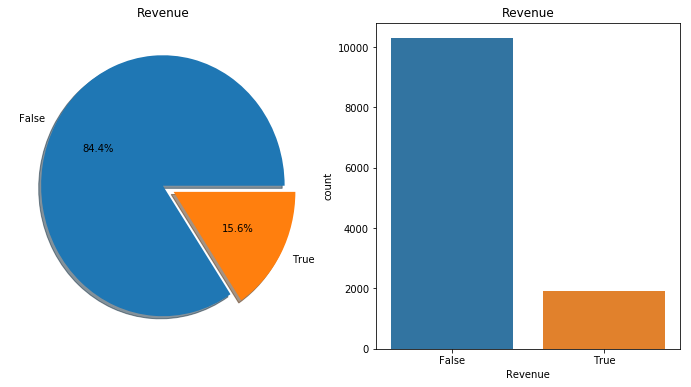

In [25]:
f,ax=plt.subplots(1,2,figsize=(12,6))
cust_data['Revenue'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Revenue')
ax[0].set_ylabel('')
sns.countplot('Revenue',data=cust_data,ax=ax[1])
ax[1].set_title('Revenue')
plt.show()

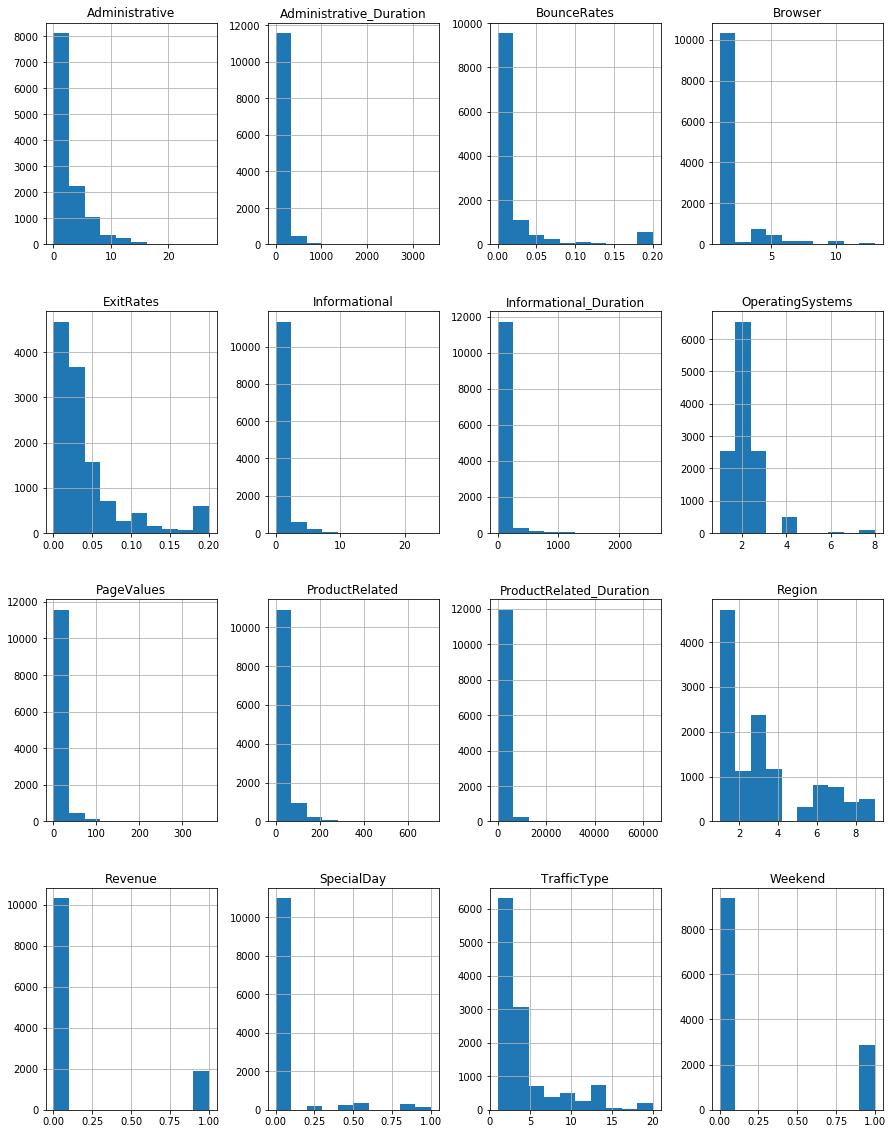

In [26]:
cust_data.hist(figsize=(15,20))
plt.show()

## Exploratory Analysis :

In [28]:
cust_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Univariate Analysis:

In [30]:
cust_data['Administrative'].describe()

count    12205.000000
mean         2.338878
std          3.330436
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

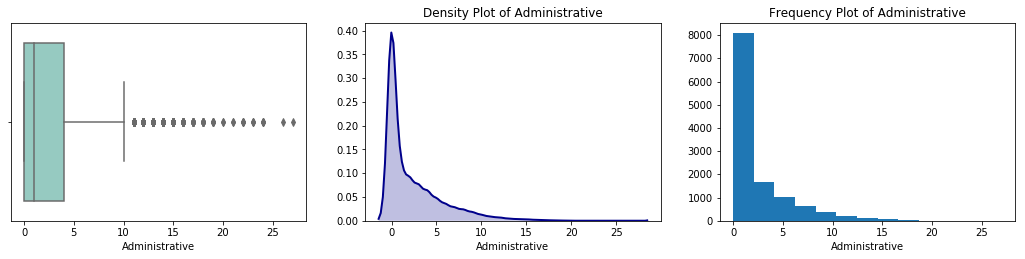

In [34]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['Administrative'],palette="Set3")
plt.xlabel('Administrative')

plt.subplot(2, 3, 2)
plt.title('Density Plot of Administrative')
ay = sns.distplot(cust_data['Administrative'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('Administrative')

plt.subplot(2, 3, 3)
plt.hist(cust_data['Administrative'],bins=13)
plt.title('Frequency Plot of Administrative')
plt.xlabel('Administrative')
plt.show()

In [35]:
cust_data['Administrative_Duration'].describe()

count    12205.000000
mean        81.646331
std        177.491845
min          0.000000
25%          0.000000
50%          9.000000
75%         94.700000
max       3398.750000
Name: Administrative_Duration, dtype: float64

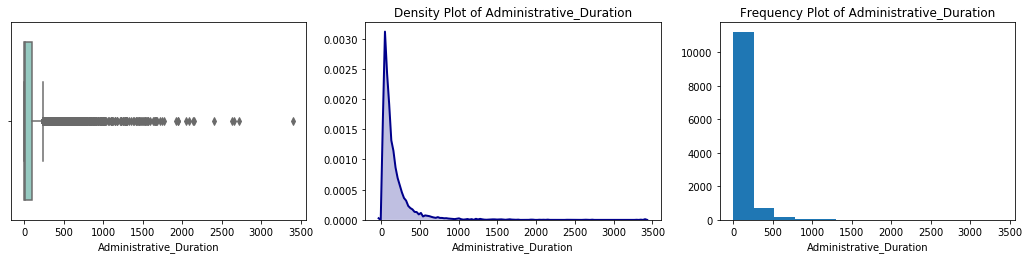

In [36]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['Administrative_Duration'],palette="Set3")
plt.xlabel('Administrative_Duration')

plt.subplot(2, 3, 2)
plt.title('Density Plot of Administrative_Duration')
ay = sns.distplot(cust_data['Administrative_Duration'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('Administrative_Duration')

plt.subplot(2, 3, 3)
plt.hist(cust_data['Administrative_Duration'],bins=13)
plt.title('Frequency Plot of Administrative_Duration')
plt.xlabel('Administrative_Duration')
plt.show()

In [37]:
cust_data['Informational'].describe()

count    12205.000000
mean         0.508726
std          1.275617
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

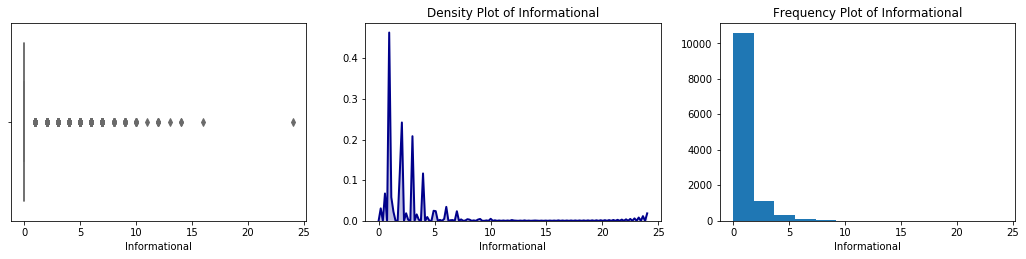

In [39]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['Informational'],palette="Set3")
plt.xlabel('Informational')

plt.subplot(2, 3, 2)
plt.title('Density Plot of Informational')
ay = sns.distplot(cust_data['Informational'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('Informational')

plt.subplot(2, 3, 3)
plt.hist(cust_data['Informational'],bins=13)
plt.title('Frequency Plot of Informational')
plt.xlabel('Informational')
plt.show()

In [41]:
cust_data['Informational_Duration'].describe()

count    12205.000000
mean        34.825454
std        141.424807
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

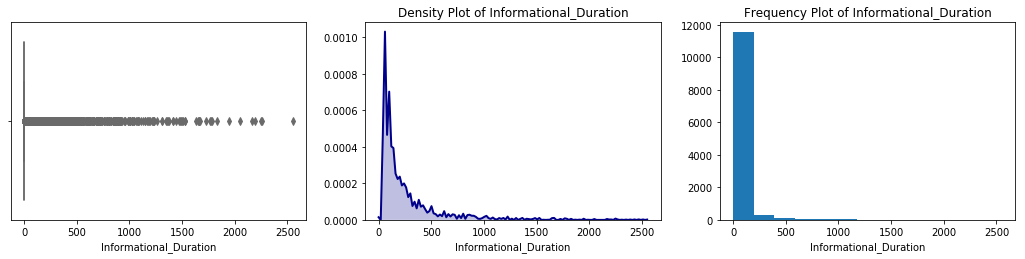

In [42]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['Informational_Duration'],palette="Set3")
plt.xlabel('Informational_Duration')

plt.subplot(2, 3, 2)
plt.title('Density Plot of Informational_Duration')
ay = sns.distplot(cust_data['Informational_Duration'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('Informational_Duration')

plt.subplot(2, 3, 3)
plt.hist(cust_data['Informational_Duration'],bins=13)
plt.title('Frequency Plot of Informational_Duration')
plt.xlabel('Informational_Duration')
plt.show()

In [47]:
P = np.percentile(cust_data.Informational_Duration, [5, 99])
cust_data_information_filtered = cust_data[(cust_data.Informational_Duration >= P[0]) & (cust_data.Informational_Duration <= P[1])]
cust_data_information_filtered.Informational_Duration.describe()

count    12082.000000
mean        23.654623
std         79.206885
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        719.000000
Name: Informational_Duration, dtype: float64

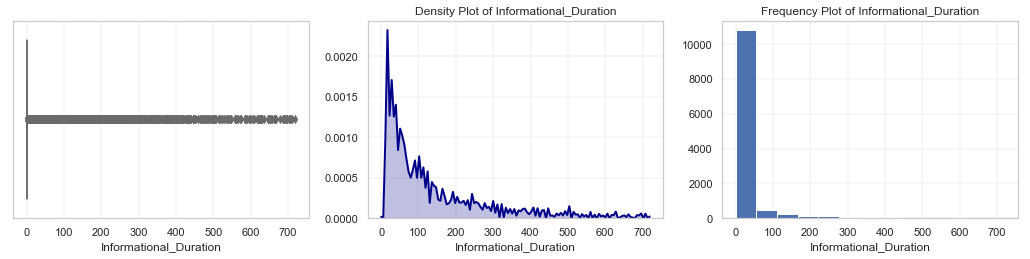

In [146]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data_information_filtered['Informational_Duration'],palette="Set3")
plt.xlabel('Informational_Duration')

plt.subplot(2, 3, 2)
plt.title('Density Plot of Informational_Duration')
ay = sns.distplot(cust_data_information_filtered['Informational_Duration'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('Informational_Duration')

plt.subplot(2, 3, 3)
plt.hist(cust_data_information_filtered['Informational_Duration'],bins=13)
plt.title('Frequency Plot of Informational_Duration')
plt.xlabel('Informational_Duration')
plt.show()

In [49]:
cust_data['ProductRelated'].describe()

count    12205.000000
mean        32.045637
std         44.593649
min          0.000000
25%          8.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

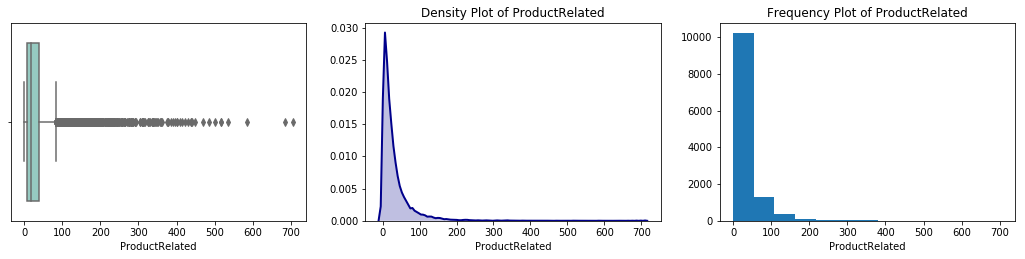

In [50]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['ProductRelated'],palette="Set3")
plt.xlabel('ProductRelated')

plt.subplot(2, 3, 2)
plt.title('Density Plot of ProductRelated')
ay = sns.distplot(cust_data['ProductRelated'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('ProductRelated')

plt.subplot(2, 3, 3)
plt.hist(cust_data['ProductRelated'],bins=13)
plt.title('Frequency Plot of ProductRelated')
plt.xlabel('ProductRelated')
plt.show()

In [51]:
cust_data['ProductRelated_Duration'].describe()

count    12205.000000
mean      1206.982457
std       1919.601400
min          0.000000
25%        193.000000
50%        608.942857
75%       1477.154762
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

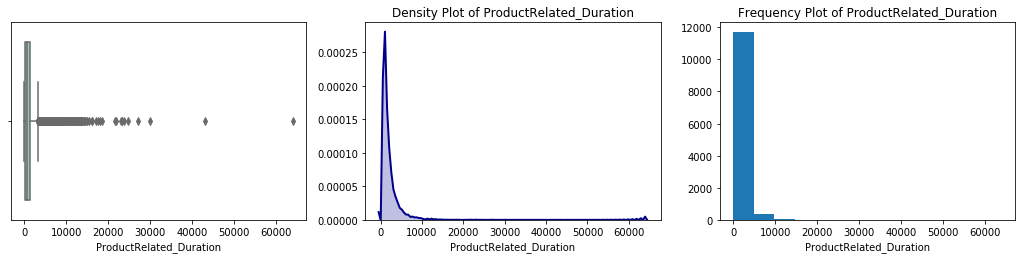

In [52]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['ProductRelated_Duration'],palette="Set3")
plt.xlabel('ProductRelated_Duration')

plt.subplot(2, 3, 2)
plt.title('Density Plot of ProductRelated_Duration')
ay = sns.distplot(cust_data['ProductRelated_Duration'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('ProductRelated_Duration')

plt.subplot(2, 3, 3)
plt.hist(cust_data['ProductRelated_Duration'],bins=13)
plt.title('Frequency Plot of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.show()

In [53]:
cust_data['BounceRates'].describe()

count    12205.000000
mean         0.020370
std          0.045255
min          0.000000
25%          0.000000
50%          0.002899
75%          0.016667
max          0.200000
Name: BounceRates, dtype: float64

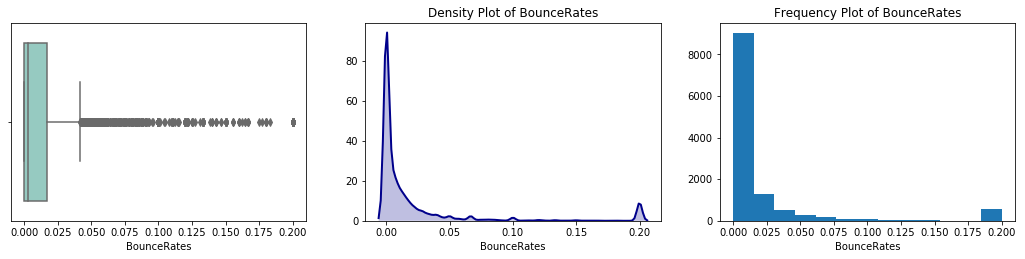

In [54]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['BounceRates'],palette="Set3")
plt.xlabel('BounceRates')

plt.subplot(2, 3, 2)
plt.title('Density Plot of BounceRates')
ay = sns.distplot(cust_data['BounceRates'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('BounceRates')

plt.subplot(2, 3, 3)
plt.hist(cust_data['BounceRates'],bins=13)
plt.title('Frequency Plot of BounceRates')
plt.xlabel('BounceRates')
plt.show()

In [56]:
cust_data['ExitRates'].describe()

count    12205.000000
mean         0.041466
std          0.046163
min          0.000000
25%          0.014231
50%          0.025000
75%          0.048529
max          0.200000
Name: ExitRates, dtype: float64

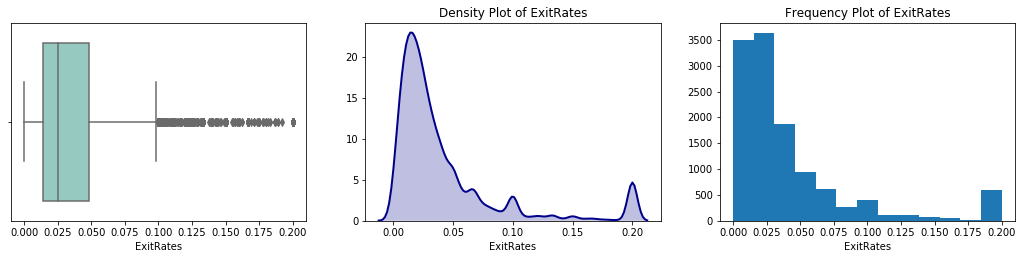

In [57]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['ExitRates'],palette="Set3")
plt.xlabel('ExitRates')

plt.subplot(2, 3, 2)
plt.title('Density Plot of ExitRates')
ay = sns.distplot(cust_data['ExitRates'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('ExitRates')

plt.subplot(2, 3, 3)
plt.hist(cust_data['ExitRates'],bins=13)
plt.title('Frequency Plot of ExitRates')
plt.xlabel('ExitRates')
plt.show()

In [58]:
cust_data['PageValues'].describe()

count    12205.000000
mean         5.949574
std         18.653671
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

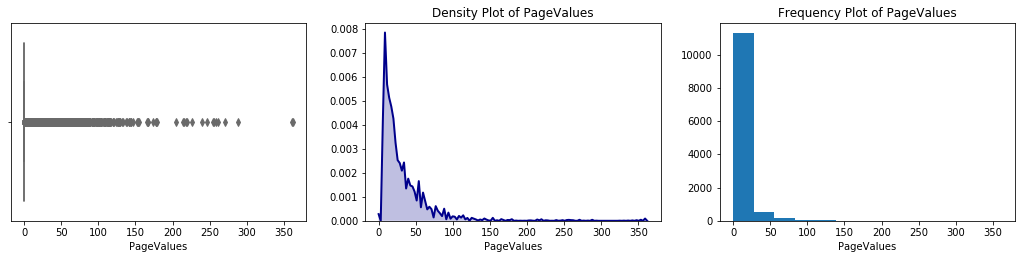

In [59]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['PageValues'],palette="Set3")
plt.xlabel('PageValues')

plt.subplot(2, 3, 2)
plt.title('Density Plot of PageValues')
ay = sns.distplot(cust_data['PageValues'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('PageValues')

plt.subplot(2, 3, 3)
plt.hist(cust_data['PageValues'],bins=13)
plt.title('Frequency Plot of PageValues')
plt.xlabel('PageValues')
plt.show()

In [61]:
cust_data['SpecialDay'].describe()

count    12205.000000
mean         0.061942
std          0.199666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

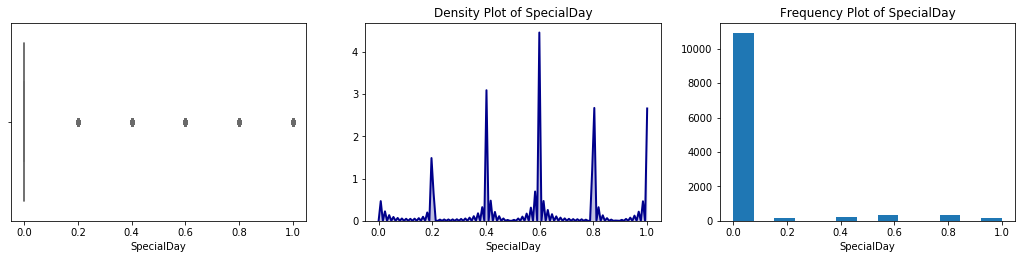

In [62]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 3, 1)
ax = sns.boxplot(x=cust_data['SpecialDay'],palette="Set3")
plt.xlabel('SpecialDay')

plt.subplot(2, 3, 2)
plt.title('Density Plot of SpecialDay')
ay = sns.distplot(cust_data['SpecialDay'], hist=False, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2},bins=13)
plt.xlabel('SpecialDay')

plt.subplot(2, 3, 3)
plt.hist(cust_data['SpecialDay'],bins=13)
plt.title('Frequency Plot of SpecialDay')
plt.xlabel('SpecialDay')
plt.show()

### Bivariate Analysis:

In [63]:
cust_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


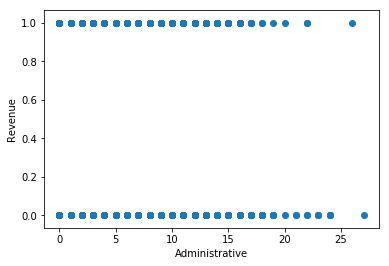

In [72]:
plt.scatter(x=cust_data['Administrative'],y=cust_data['Revenue'])
plt.xlabel('Administrative')
plt.ylabel('Revenue')
plt.show()

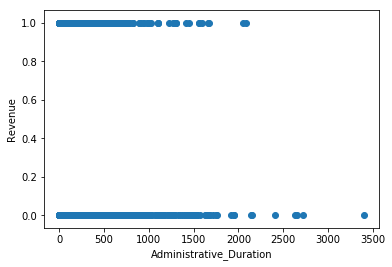

In [73]:
plt.scatter(x=cust_data['Administrative_Duration'],y=cust_data['Revenue'])
plt.xlabel('Administrative_Duration')
plt.ylabel('Revenue')
plt.show()

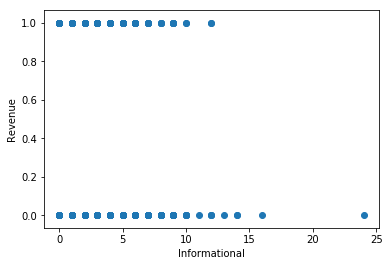

In [74]:
plt.scatter(x=cust_data['Informational'],y=cust_data['Revenue'])
plt.xlabel('Informational')
plt.ylabel('Revenue')
plt.show()

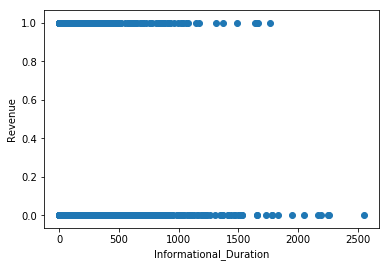

In [75]:
plt.scatter(x=cust_data['Informational_Duration'],y=cust_data['Revenue'])
plt.xlabel('Informational_Duration')
plt.ylabel('Revenue')
plt.show()

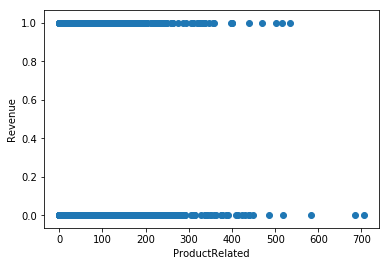

In [76]:
plt.scatter(x=cust_data['ProductRelated'],y=cust_data['Revenue'])
plt.xlabel('ProductRelated')
plt.ylabel('Revenue')
plt.show()

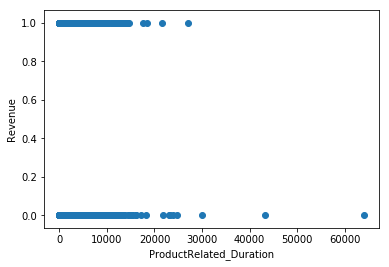

In [77]:
plt.scatter(x=cust_data['ProductRelated_Duration'],y=cust_data['Revenue'])
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Revenue')
plt.show()

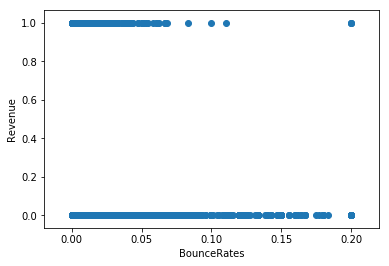

In [78]:
plt.scatter(x=cust_data['BounceRates'],y=cust_data['Revenue'])
plt.xlabel('BounceRates')
plt.ylabel('Revenue')
plt.show()

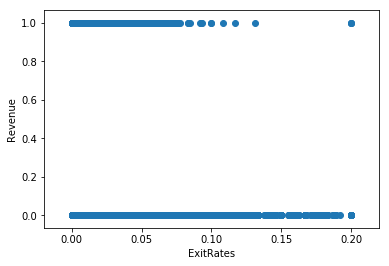

In [79]:
plt.scatter(x=cust_data['ExitRates'],y=cust_data['Revenue'])
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()

In [82]:
cust_data.groupby(['PageValues','Revenue']).size()

PageValues  Revenue
0.000000    False      9105
            True        370
0.038035    False         1
0.067050    True          1
0.093547    True          1
0.098621    True          1
0.120700    True          1
0.129677    False         1
0.131837    True          1
0.139201    True          1
0.150650    False         1
0.152167    True          1
0.154821    False         1
0.179827    False         1
0.201664    False         1
0.245153    False         1
0.252722    False         1
0.255191    False         1
0.268093    False         1
0.305312    True          1
0.335232    False         1
0.384720    False         1
0.408238    False         1
0.447039    False         1
0.468406    False         1
0.513386    False         1
0.546128    False         1
0.548811    False         1
0.579786    False         1
0.582750    False         1
                       ... 
143.476678  True          1
144.393489  True          1
146.238750  True          1
151.565052  True          1


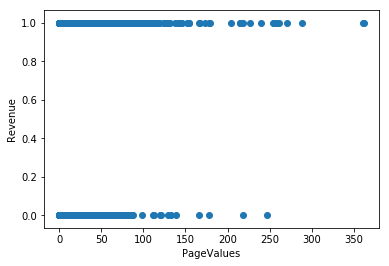

In [80]:
plt.scatter(x=cust_data['PageValues'],y=cust_data['Revenue'])
plt.xlabel('PageValues')
plt.ylabel('Revenue')
plt.show()

Higher the page value chances that the user will make a purchase are more.

In [83]:
cust_data.groupby(['SpecialDay','Revenue']).size()

SpecialDay  Revenue
0.0         False      9125
            True       1831
0.2         False       164
            True         14
0.4         False       230
            True         13
0.6         False       321
            True         29
0.8         False       313
            True         11
1.0         False       144
            True         10
dtype: int64

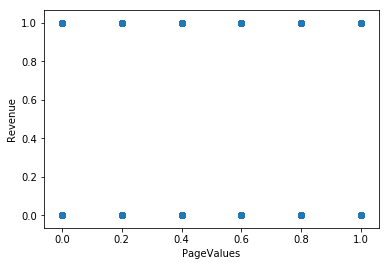

In [81]:
plt.scatter(x=cust_data['SpecialDay'],y=cust_data['Revenue'])
plt.xlabel('PageValues')
plt.ylabel('Revenue')
plt.show()

**Categorical Variables:**

In [90]:
cust_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [84]:
region_df = pd.DataFrame(cust_data.groupby(['Region','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
region_df.head()

,Region,Revenue,Number of Customers
0,1,False,3943
1,1,True,771
2,2,False,940
3,2,True,188
4,3,False,2030


In [85]:
region_df_pct = pd.DataFrame(region_df.groupby(['Region','Revenue']).agg({'Number of Customers':'sum'}))
region_df_pct = region_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
region_df_pct.head()

,Region,Revenue,Percentage of Customers
0,1,False,83.64
1,1,True,16.36
2,2,False,83.33
3,2,True,16.67
4,3,False,85.33


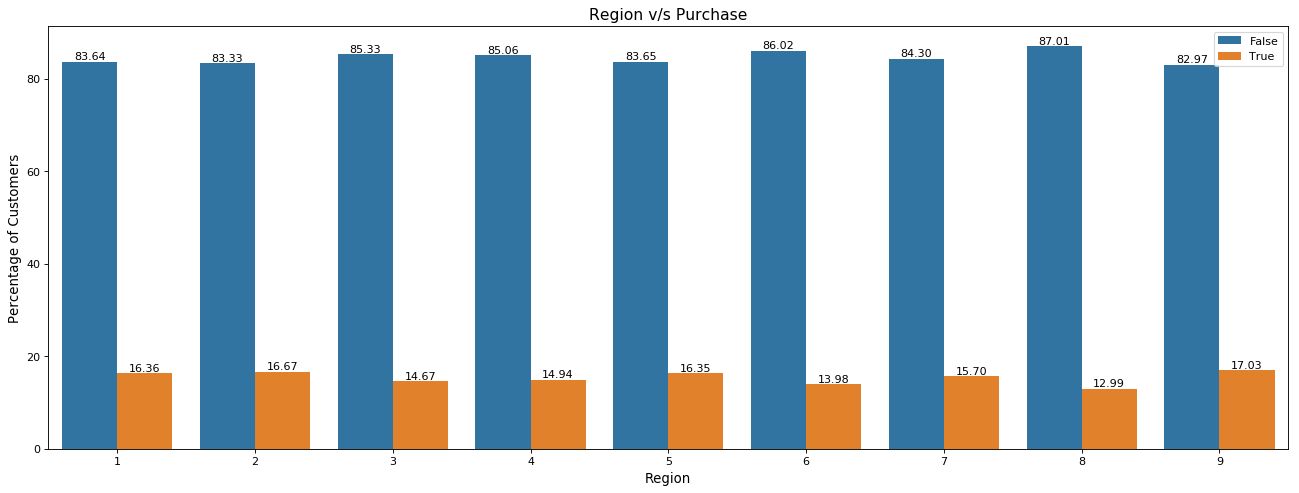

In [89]:
plt.figure(figsize=(20,7),dpi=80)
ax = sns.barplot(data=region_df_pct,x='Region',y='Percentage of Customers',hue='Revenue')
ax.set_title("Region v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('Region',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

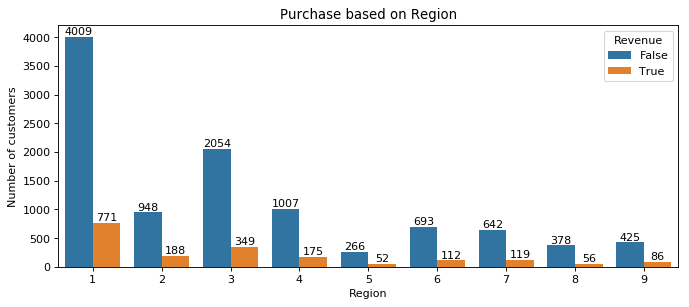

In [17]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=cust_data,x='Region',hue='Revenue')
plt.title('Purchase based on Region')
plt.ylabel('Number of customers')
plt.xlabel('Region')
create_label(ax,'integer')
plt.show()

In [94]:
month_df = pd.DataFrame(cust_data.groupby(['Month','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
month_df.head()

,Month,Revenue,Number of Customers
0,Aug,False,357
1,Aug,True,76
2,Dec,False,1490
3,Dec,True,216
4,Feb,False,178


In [95]:
month_df_pct = pd.DataFrame(month_df.groupby(['Month','Revenue']).agg({'Number of Customers':'sum'}))
month_df_pct = month_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
month_df_pct.head()

,Month,Revenue,Percentage of Customers
0,Aug,False,82.45
1,Aug,True,17.55
2,Dec,False,87.34
3,Dec,True,12.66
4,Feb,False,98.34


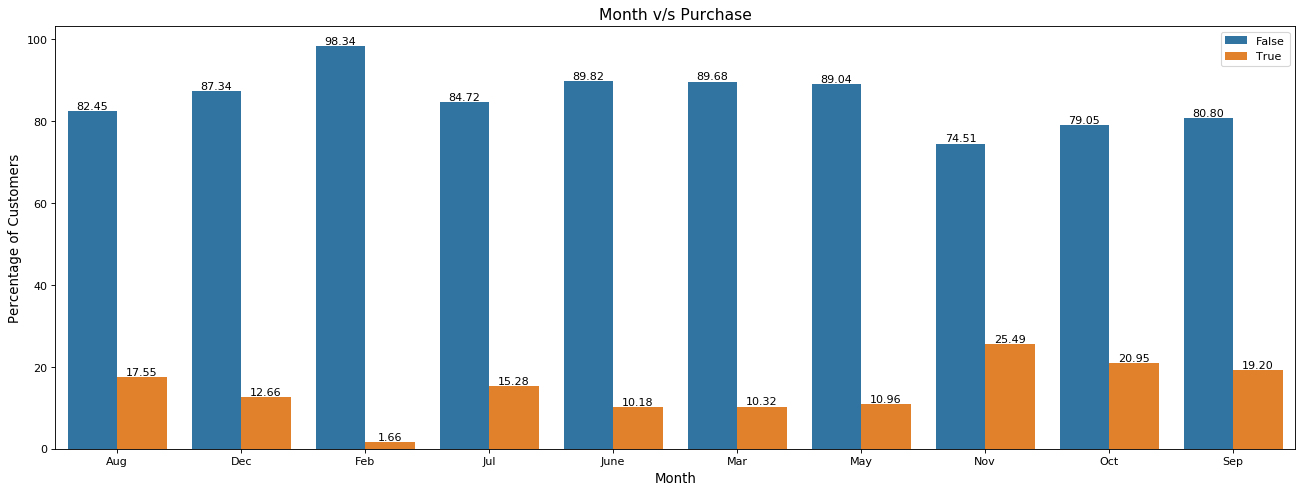

In [96]:
plt.figure(figsize=(20,7),dpi=80)
ax = sns.barplot(data=month_df_pct,x='Month',y='Percentage of Customers',hue='Revenue')
ax.set_title("Month v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('Month',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

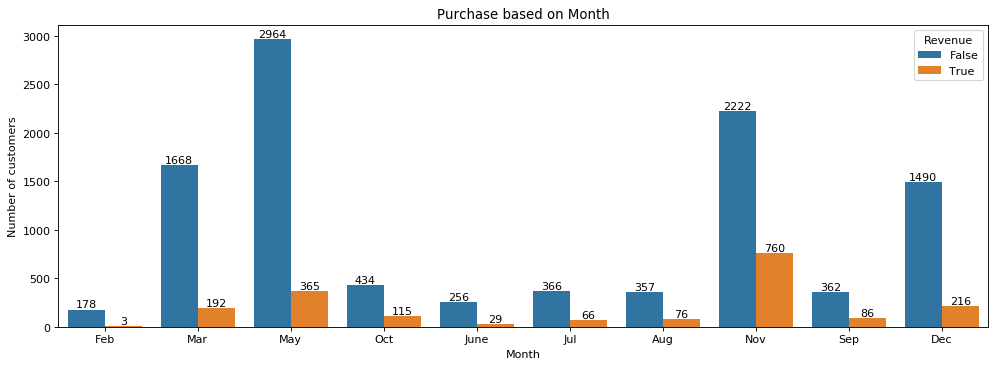

In [99]:
plt.figure(figsize=(15,5),dpi=80)
ax = sns.countplot(data=cust_data,x='Month',hue='Revenue')
plt.title('Purchase based on Month')
plt.ylabel('Number of customers')
plt.xlabel('Month')
create_label(ax,'integer')
plt.show()

In [108]:
os_df = pd.DataFrame(cust_data.groupby(['OperatingSystems','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
os_df.head()

,OperatingSystems,Revenue,Number of Customers
0,1,False,2170
1,1,True,379
2,2,False,5386
3,2,True,1155
4,3,False,2262


In [109]:
os_df_pct = pd.DataFrame(os_df.groupby(['OperatingSystems','Revenue']).agg({'Number of Customers':'sum'}))
os_df_pct = os_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
os_df_pct.head()

,OperatingSystems,Revenue,Percentage of Customers
0,1,False,85.13
1,1,True,14.87
2,2,False,82.34
3,2,True,17.66
4,3,False,89.41


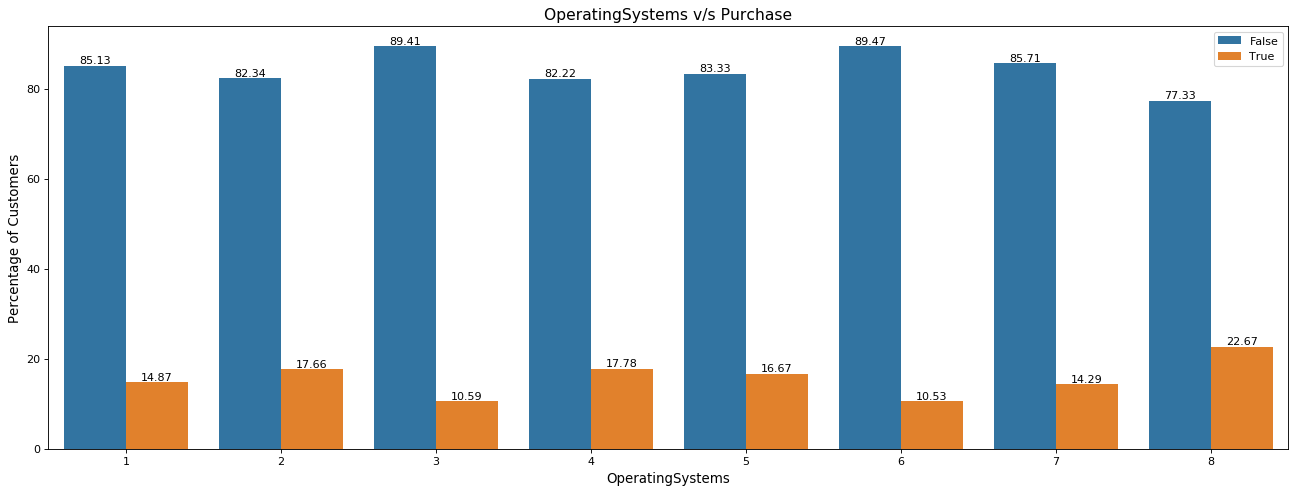

In [110]:
plt.figure(figsize=(20,7),dpi=80)
ax = sns.barplot(data=os_df_pct,x='OperatingSystems',y='Percentage of Customers',hue='Revenue')
ax.set_title("OperatingSystems v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('OperatingSystems',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

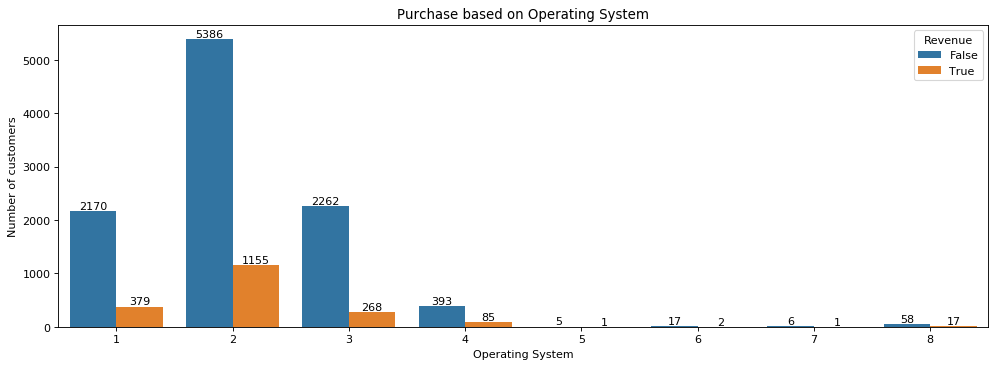

In [111]:
plt.figure(figsize=(15,5),dpi=80)
ax = sns.countplot(data=cust_data,x='OperatingSystems',hue='Revenue')
plt.title('Purchase based on Operating System')
plt.ylabel('Number of customers')
plt.xlabel('Operating System')
create_label(ax,'integer')
plt.show()

In [112]:
browser_df = pd.DataFrame(cust_data.groupby(['Browser','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
browser_df.head()

,Browser,Revenue,Number of Customers
0,1,False,2062
1,1,True,365
2,2,False,6660
3,2,True,1223
4,3,False,100


In [113]:
browser_df_pct = pd.DataFrame(browser_df.groupby(['Browser','Revenue']).agg({'Number of Customers':'sum'}))
browser_df_pct = browser_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
browser_df_pct.head()

,Browser,Revenue,Percentage of Customers
0,1,False,84.96
1,1,True,15.04
2,2,False,84.49
3,2,True,15.51
4,3,False,95.24


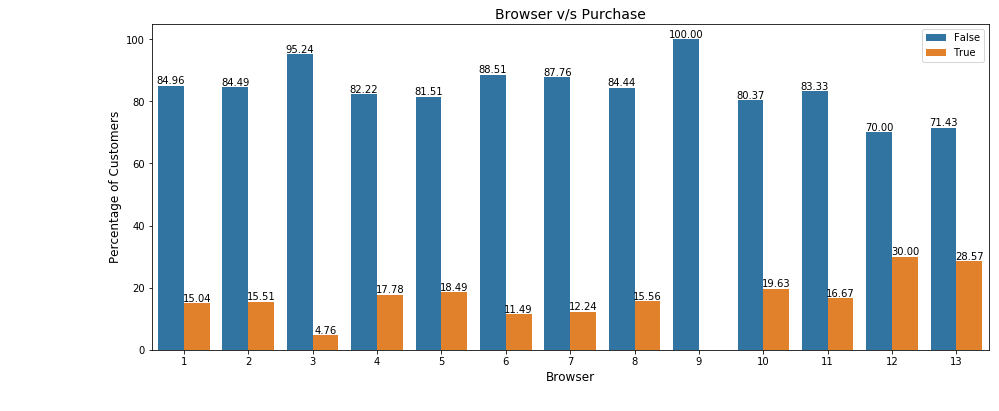

In [123]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=browser_df_pct,x='Browser',y='Percentage of Customers',hue='Revenue')
ax.set_title("Browser v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('Browser',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

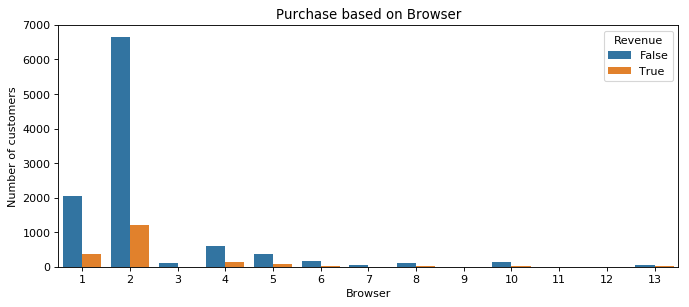

In [115]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=cust_data,x='Browser',hue='Revenue')
plt.title('Purchase based on Browser')
plt.ylabel('Number of customers')
plt.xlabel('Browser')
plt.show()

In [124]:
cust_data['TrafficType'].value_counts()

2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

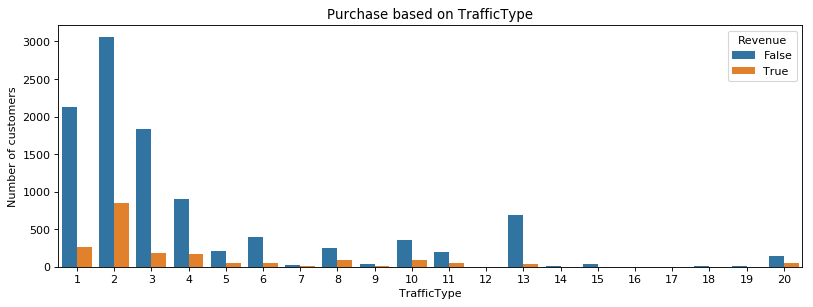

In [126]:
plt.figure(figsize=(12,4),dpi=80)
ax = sns.countplot(data=cust_data,x='TrafficType',hue='Revenue')
plt.title('Purchase based on TrafficType')
plt.ylabel('Number of customers')
plt.xlabel('TrafficType')
plt.show()

In [127]:
visitor_df = pd.DataFrame(cust_data.groupby(['VisitorType','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
visitor_df.head()

,VisitorType,Revenue,Number of Customers
0,New_Visitor,False,1271
1,New_Visitor,True,422
2,Other,False,65
3,Other,True,16
4,Returning_Visitor,False,8961


In [128]:
visitor_df_pct = pd.DataFrame(visitor_df.groupby(['VisitorType','Revenue']).agg({'Number of Customers':'sum'}))
visitor_df_pct = visitor_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
visitor_df_pct.head()

,VisitorType,Revenue,Percentage of Customers
0,New_Visitor,False,75.07
1,New_Visitor,True,24.93
2,Other,False,80.25
3,Other,True,19.75
4,Returning_Visitor,False,85.91


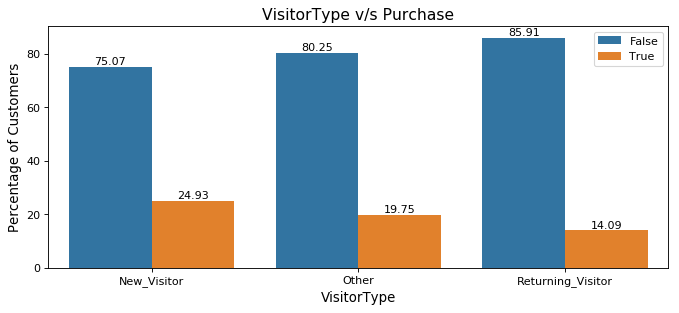

In [132]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.barplot(data=visitor_df_pct,x='VisitorType',y='Percentage of Customers',hue='Revenue')
ax.set_title("VisitorType v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('VisitorType',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

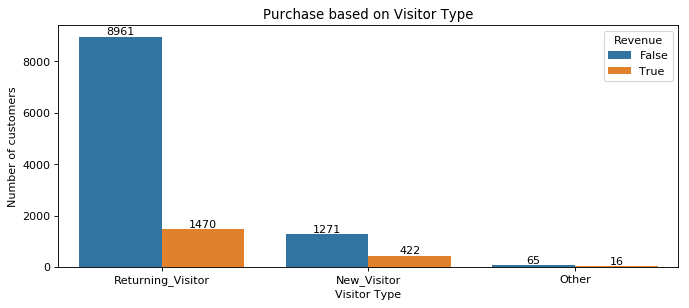

In [131]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=cust_data,x='VisitorType',hue='Revenue')
plt.title('Purchase based on Visitor Type')
plt.ylabel('Number of customers')
plt.xlabel('Visitor Type')
create_label(ax,'integer')
plt.show()

In [133]:
weekend_df = pd.DataFrame(cust_data.groupby(['Weekend','Revenue']).size()).reset_index().rename(columns={0:'Number of Customers'})
weekend_df.head()

,Weekend,Revenue,Number of Customers
0,False,False,7937
1,False,True,1409
2,True,False,2360
3,True,True,499


In [134]:
weekend_df_pct = pd.DataFrame(weekend_df.groupby(['Weekend','Revenue']).agg({'Number of Customers':'sum'}))
weekend_df_pct = weekend_df_pct.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),2)).reset_index().rename(columns={'Number of Customers':'Percentage of Customers'})
weekend_df_pct.head()

,Weekend,Revenue,Percentage of Customers
0,False,False,84.92
1,False,True,15.08
2,True,False,82.55
3,True,True,17.45


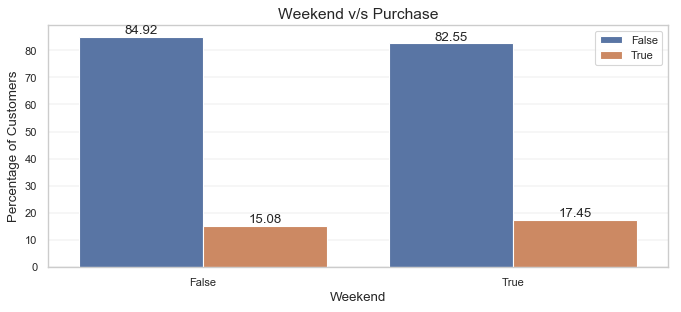

In [144]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.barplot(data=weekend_df_pct,x='Weekend',y='Percentage of Customers',hue='Revenue')
ax.set_title("Weekend v/s Purchase",fontsize = 14)
ax.tick_params(labelsize=10)
ax.set_xlabel('Weekend',fontsize = 12)
ax.set_ylabel('Percentage of Customers',fontsize = 12)
ax.legend(loc='upper right', frameon=True,fontsize=10)
create_label(ax,'float')
plt.show()

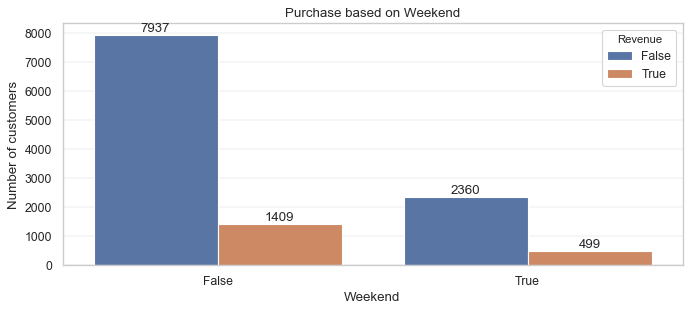

In [143]:
plt.figure(figsize=(10,4),dpi=80)
ax = sns.countplot(data=cust_data,x='Weekend',hue='Revenue')
plt.title('Purchase based on Weekend')
plt.ylabel('Number of customers')
plt.xlabel('Weekend')
create_label(ax,'integer')
plt.show()

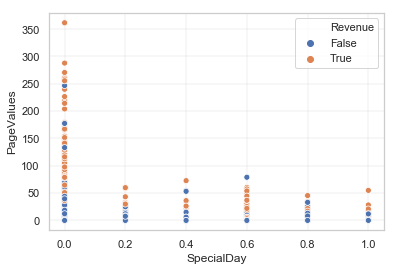

In [142]:
sns.scatterplot(data=cust_data,x='SpecialDay',y='PageValues',hue='Revenue')

In [152]:
cust_data.shape

(12205, 18)

In [153]:
cust_data_numeric = cust_data.select_dtypes(exclude='object')
cust_data_numeric.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False


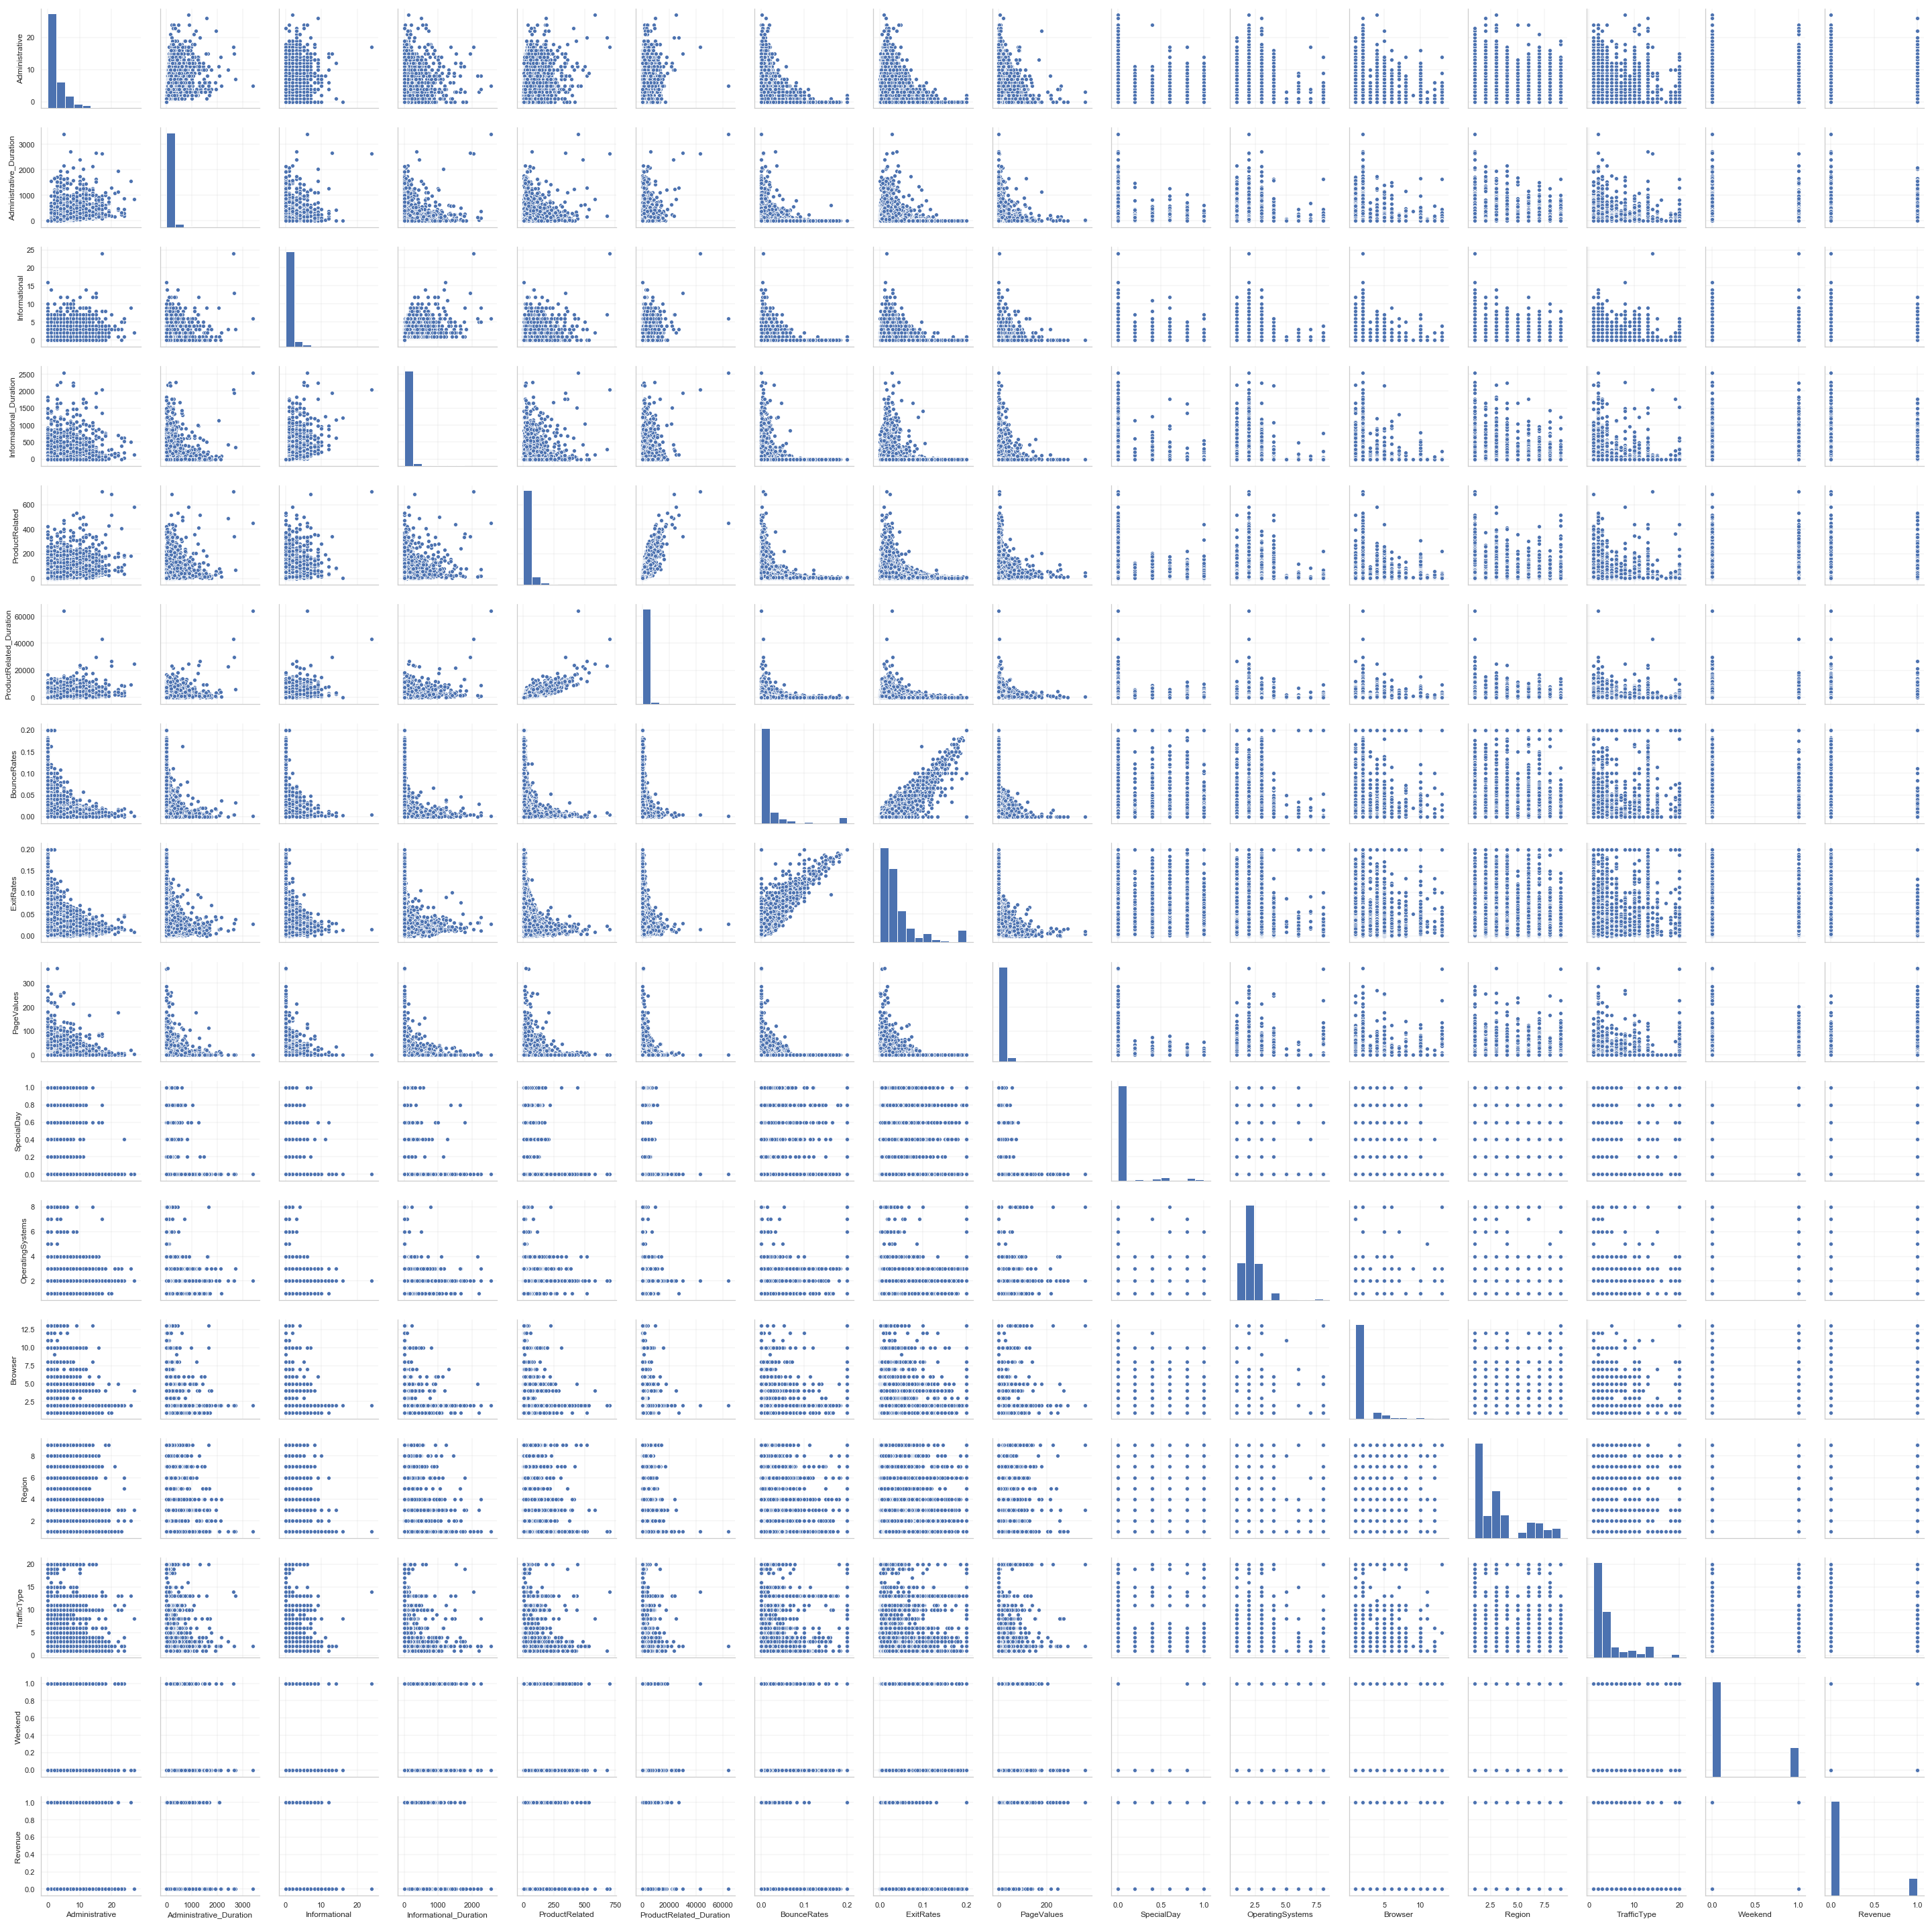

In [154]:
sns.pairplot(cust_data_numeric)

In [147]:
cust_data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,-0.006586,-0.025622,-0.007262,-0.034643,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,-0.007529,-0.015742,-0.006729,-0.014991,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,-0.009721,-0.038787,-0.030317,-0.035197,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,-0.009734,-0.019573,-0.027891,-0.025126,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.004194,-0.013586,-0.040108,-0.044223,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.002870,-0.007724,-0.034869,-0.037390,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,0.026811,-0.015501,0.002787,0.089184,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,0.016345,-0.003323,-0.000987,0.087478,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.018632,0.045908,0.010588,0.012286,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.012806,0.003528,-0.016450,0.052856,-0.017723,-0.083601


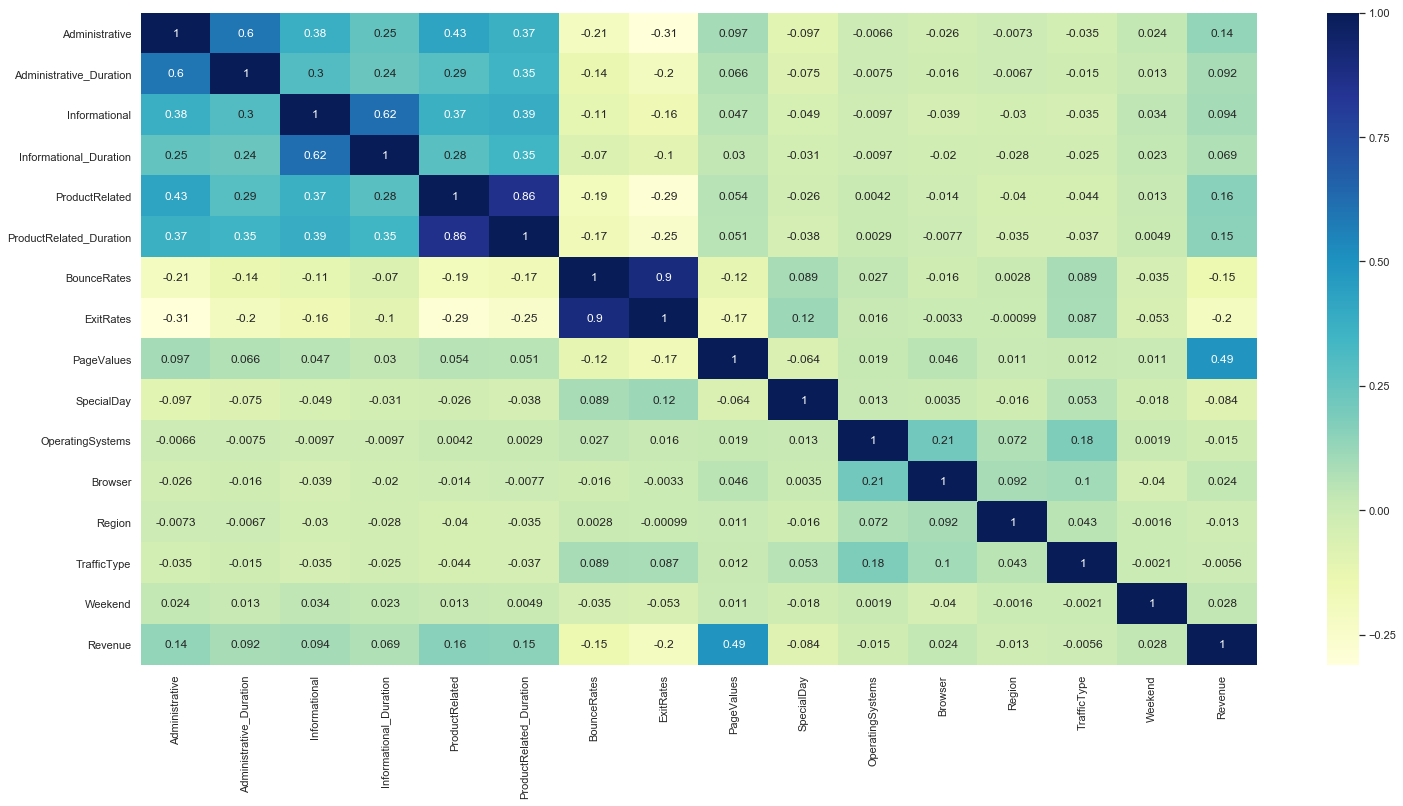

In [148]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,12))

# heatmap
sns.heatmap(cust_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [155]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(cust_data_numeric, 10))

Top Absolute Correlations
BounceRates     ExitRates                  0.902144
ProductRelated  ProductRelated_Duration    0.860330
Informational   Informational_Duration     0.618648
Administrative  Administrative_Duration    0.600457
PageValues      Revenue                    0.491894
Administrative  ProductRelated             0.428305
Informational   ProductRelated_Duration    0.386052
Administrative  Informational              0.375256
Informational   ProductRelated             0.372572
Administrative  ProductRelated_Duration    0.371146
dtype: float64


In [163]:
cust_data_new = cust_data.copy()
cust_data_new.shape

(12205, 18)

In [164]:
cust_data_new = cust_data_new.drop(['ExitRates','ProductRelated_Duration','Informational_Duration','Administrative_Duration'],axis=1)
cust_data_new.shape

(12205, 14)

In [165]:
cust_data_new.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,1,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,2,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,1,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,2,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,10,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [166]:
cust_data_new.nunique()

Administrative        27
Informational         17
ProductRelated       311
BounceRates         1872
PageValues          2704
SpecialDay             6
Month                 10
OperatingSystems       8
Browser               13
Region                 9
TrafficType           20
VisitorType            3
Weekend                2
Revenue                2
dtype: int64

In [167]:
# List of variables to map

varlist =  ['Weekend','Revenue']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
cust_data_new[varlist] = cust_data_new[varlist].apply(binary_map)

In [168]:
cust_data_new.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,1,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0,2,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0,1,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0,2,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0,10,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [169]:
cust_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 14 columns):
Administrative      12205 non-null int64
Informational       12205 non-null int64
ProductRelated      12205 non-null int64
BounceRates         12205 non-null float64
PageValues          12205 non-null float64
SpecialDay          12205 non-null float64
Month               12205 non-null object
OperatingSystems    12205 non-null int64
Browser             12205 non-null int64
Region              12205 non-null int64
TrafficType         12205 non-null int64
VisitorType         12205 non-null object
Weekend             12205 non-null int64
Revenue             12205 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 1.4+ MB


In [170]:
# Let's convert it into object type and later we will create dummy for this column
cust_data_new['OperatingSystems'] = cust_data_new['OperatingSystems'].astype('object')
cust_data_new['Browser'] = cust_data_new['Browser'].astype('object')
cust_data_new['Region'] = cust_data_new['Region'].astype('object')
cust_data_new['TrafficType'] = cust_data_new['TrafficType'].astype('object')

In [172]:
cust_data_cat = cust_data_new.select_dtypes(include=['object']).copy()
cust_data_cat.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor
2,Feb,4,1,9,3,Returning_Visitor
3,Feb,3,2,2,4,Returning_Visitor
4,Feb,3,3,1,4,Returning_Visitor


In [173]:
cust_data_dummies = pd.get_dummies(cust_data_cat,drop_first=True)
cust_data_dummies.head()

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [174]:
cust_data_new = cust_data_new.drop(list(cust_data_cat.columns), axis=1)
cust_data_new.shape

(12205, 8)

In [175]:
cust_data_new.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Revenue
0,0,0,1,0.20,0.0,0.0,0,0
1,0,0,2,0.00,0.0,0.0,0,0
2,0,0,1,0.20,0.0,0.0,0,0
3,0,0,2,0.05,0.0,0.0,0,0
4,0,0,10,0.02,0.0,0.0,1,0


In [177]:
# concat dummy variables with original dataframe
cust_data_final = pd.concat([cust_data_new, cust_data_dummies], axis=1)
cust_data_final.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0.20,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0.00,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0.20,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0.05,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,10,0.02,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [178]:
cust_data_final.shape

(12205, 65)

In [179]:
cust_data_final.Revenue.value_counts()/len(cust_data_final.index)

0    0.843671
1    0.156329
Name: Revenue, dtype: float64

## Model Building and Evaluation :

In [337]:
# split into train and test
np.random.seed(0)


from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(cust_data_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [338]:
df_train.shape

(8543, 65)

In [339]:
df_test.shape

(3662, 65)

In [340]:
df_train.Revenue.value_counts()/len(df_train.index)

0    0.847243
1    0.152757
Name: Revenue, dtype: float64

In [341]:
df_test.Revenue.value_counts()/len(df_test.index)

0    0.835336
1    0.164664
Name: Revenue, dtype: float64

In [342]:
# Divide into X and Y sets for model building
y_train = df_train.pop('Revenue')
X_train = df_train

In [343]:
X_train.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
7007,10,1,39,0.004255,112.440621,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4725,7,0,27,0.013333,0.000000,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
80,0,0,7,0.000000,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7324,1,0,42,0.000000,11.330371,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8166,0,0,1,0.200000,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [344]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
X_train.loc[:,'Administrative':'SpecialDay'] = scaler.fit_transform(X_train.loc[:,'Administrative':'SpecialDay'])
X_train.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
7007,0.370370,0.041667,0.055319,0.021277,0.310812,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4725,0.259259,0.000000,0.038298,0.066667,0.000000,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
80,0.000000,0.000000,0.009929,0.000000,0.000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7324,0.037037,0.000000,0.059574,0.000000,0.031320,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8166,0.000000,0.000000,0.001418,1.000000,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [345]:
# Divide into X and Y sets for model building
y_test = df_test.pop('Revenue')
X_test = df_test

In [346]:
# Apply scaler() to all the columns except the 'dummy' variables
X_test.loc[:,'Administrative':'SpecialDay'] = scaler.transform(X_test.loc[:,'Administrative':'SpecialDay'])
X_test.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
4835,0.000000,0.000000,0.034043,0.083333,0.000000,0.4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
697,0.111111,0.041667,0.063830,0.000000,0.057970,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6653,0.000000,0.000000,0.058156,0.137631,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
960,0.000000,0.000000,0.008511,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1397,0.296296,0.000000,0.043972,0.027027,0.010751,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Statsmodel Logistic Regression:

In [347]:
import statsmodels.api as sm

In [348]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 8543
Model:                            GLM   Df Residuals:                     8479
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2456.2
Date:                Thu, 18 Apr 2019   Deviance:                       4912.5
Time:                        00:53:47   Pearson chi2:                 1.54e+08
No. Iterations:                    22                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.3200      0.253     -9.166      0.000      -2.816      -1.824
Administrative                    0.3149      0.305      1.033      0.302      -0.283       0.912
Informational                     0.8817      0.655      1.347      0.178      -0.402       2.165
ProductRelated                    3.6512      0.531      6.877      0.000       2.611       4.692
BounceRates                      -2.9559      0.559     -5.292      0.000      -4.051      -1.861
PageValues                       30.4540      1.038     29.327      0.000      28.419      32.489
SpecialDay                       -0.0178      0.273     -0.065      0.948      -0.553       0.517
Weekend                           0.0350      0.088      0.396      0.692      -0.138       0.208
Month_Dec                        -0.7136      0.222     -3.220      0.001      -1.148      -0.279
Month_Feb                        -1.6569      0.775     -2.137      0.033      -3.176      -0.138
Month_Jul                         0.1040      0.258      0.403      0.687      -0.401       0.609
Month_June                       -0.6689      0.345     -1.939      0.053      -1.345       0.007
Month_Mar                        -0.5064      0.219     -2.316      0.021      -0.935      -0.078
Month_May                        -0.6285      0.209     -3.007      0.003      -1.038      -0.219
Month_Nov                         0.3832      0.198      1.934      0.053      -0.005       0.771
Month_Oct                        -0.1206      0.244     -0.494      0.622      -0.600       0.358
Month_Sep                        -0.1837      0.259     -0.708      0.479      -0.692       0.325
OperatingSystems_2                0.1405      0.200      0.701      0.483      -0.252       0.533
OperatingSystems_3               -0.0363      0.216     -0.168      0.866      -0.459       0.386
OperatingSystems_4               -0.2554      0.231     -1.107      0.268      -0.708       0.197
OperatingSystems_5                0.0905      0.626      0.145      0.885      -1.136       1.317
OperatingSystems_6               -0.7309      1.015     -0.720      0.471      -2.720       1.258
OperatingSystems_7              -20.3588   3.13e+04     -0.001      0.999   -6.14e+04    6.13e+04
OperatingSystems_8                0.8677      0.733      1.183      0.237      -0.569       2.305
Browser_2                        -0.1123      0.202     -0.555      0.579      -0.509       0.284
Browser_3                        -1.2839      0.807     -1.592      0.111      -2.865       0.297
Browser_4                        -0.1309      0.256     -0.512      0.609      -0.632       0.370
Browser_5                        -0.0108      0.276     -0.039      0.969      -0.551       0.529
Browser_6                        -0.5791      0.425     -1.363      0.173      -1.412       0.254
Browser_7                 

In [349]:
logreg = LogisticRegression()

In [350]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [351]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Administrative', True, 1),
 ('Informational', True, 1),
 ('ProductRelated', True, 1),
 ('BounceRates', True, 1),
 ('PageValues', True, 1),
 ('SpecialDay', False, 12),
 ('Weekend', False, 47),
 ('Month_Dec', True, 1),
 ('Month_Feb', True, 1),
 ('Month_Jul', False, 31),
 ('Month_June', True, 1),
 ('Month_Mar', True, 1),
 ('Month_May', True, 1),
 ('Month_Nov', False, 7),
 ('Month_Oct', False, 50),
 ('Month_Sep', False, 25),
 ('OperatingSystems_2', False, 23),
 ('OperatingSystems_3', False, 37),
 ('OperatingSystems_4', False, 38),
 ('OperatingSystems_5', False, 33),
 ('OperatingSystems_6', False, 19),
 ('OperatingSystems_7', False, 10),
 ('OperatingSystems_8', False, 13),
 ('Browser_2', False, 28),
 ('Browser_3', True, 1),
 ('Browser_4', False, 27),
 ('Browser_5', False, 49),
 ('Browser_6', False, 9),
 ('Browser_7', False, 36),
 ('Browser_8', False, 11),
 ('Browser_9', False, 43),
 ('Browser_10', False, 35),
 ('Browser_11', False, 29),
 ('Browser_12', False, 20),
 ('Browser_13', False, 

In [352]:
col = X_train.columns[rfe.support_]
col

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'PageValues', 'Month_Dec', 'Month_Feb', 'Month_June', 'Month_Mar',
       'Month_May', 'Browser_3', 'TrafficType_8', 'TrafficType_13',
       'TrafficType_15', 'TrafficType_16'],
      dtype='object')

In [353]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 8543
Model:                            GLM   Df Residuals:                     8527
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2497.7
Date:                Thu, 18 Apr 2019   Deviance:                       4995.4
Time:                        00:53:50   Pearson chi2:                 1.82e+08
No. Iterations:                    22                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0159      0.072    -27.811      0.000      -2.158      -1.874
Administrative     0.2129      0.298      0.715      0.474      -0.370       0.796
Informational      1.1408      0.639      1.785      0.074      -0.112       2.393
ProductRelated     3.4891      0.504      6.928      0.000       2.502       4.476
BounceRates       -3.7094      0.591     -6.281      0.000      -4.867      -2.552
PageValues        30.3437      1.018     29.817      0.000      28.349      32.338
Month_Dec         -0.9026      0.125     -7.229      0.000      -1.147      -0.658
Month_Feb         -2.0786      0.737     -2.820      0.005      -3.523      -0.634
Month_June        -0.9311      0.296     -3.147      0.002      -1.511      -0.351
Month_Mar         -0.7918      0.120     -6.584      0.000      -1.027      -0.556
Month_May         -0.8952      0.099     -9.071      0.000      -1.089      -0.702
Browser_3         -1.3007      0.780     -1.668      0.095      -2.829       0.228
TrafficType_8      0.7361      0.190      3.872      0.000       0.364       1.109
TrafficType_13    -0.6006      0.221     -2.712      0.007      -1.035      -0.167
TrafficType_15   -20.3110    1.4e+04     -0.001      0.999   -2.75e+04    2.74e+04
TrafficType_16     2.8158      1.423      1.978      0.048       0.026       5.605
==================================================================================
"""

In [ ]:
col = col.drop('TrafficType_15', 1)

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

col = col.drop('Administrative', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

col = col.drop('Browser_3', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

y_train_pred = res.predict(X_train_sm)

y_train_pred_final = pd.DataFrame({'Revenue':y_train.values, 'Purch_Prob':y_train_pred})
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Purch_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Let's see the head
y_train_pred_final.head()

# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Revenue, y_train_pred_final.predicted )
confusion

print(metrics.accuracy_score(y_train_pred_final.Revenue, y_train_pred_final.predicted))

from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Revenue, y_train_pred_final.predicted))

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Revenue, y_train_pred_final.Purch_Prob, drop_intermediate = False )

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

draw_roc(y_train_pred_final.Revenue, y_train_pred_final.Purch_Prob)

precision_score(y_train_pred_final.Revenue, y_train_pred_final.predicted)

recall_score(y_train_pred_final.Revenue, y_train_pred_final.predicted)

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Revenue, y_train_pred_final.Purch_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

X_test_new = X_test[col]

X_test_sm = sm.add_constant(X_test_new)

y_test_pred = res.predict(X_test_sm)



y_test_pred_final = pd.DataFrame({'Revenue':y_test.values, 'Purch_Prob':y_test_pred})
y_test_pred_final.head()

y_test_pred_final['predicted'] = y_test_pred_final.Purch_Prob.map(lambda x: 1 if x > 0.22 else 0)

# Let's see the head
y_test_pred_final.head()

print(classification_report(y_test_pred_final.Revenue, y_test_pred_final.predicted))

res.summary()

### Logistic Regression :

col

X_train[col].shape

X_test[col].shape

clf = LogisticRegression()
clf.fit(X_train[col], y_train)
y_pred = clf.predict(X_test[col])

confusion_matrix(y_true=y_test, y_pred=y_pred)

print(classification_report(y_test, y_pred))

### SVM : 

from sklearn.svm import SVC
model = SVC(C = 1,kernel='linear')

# fit
model.fit(X_train[col], y_train)

# predict
y_pred = model.predict(X_test[col])

confusion_matrix(y_true=y_test, y_pred=y_pred)

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

model.coef_

from sklearn.model_selection import StratifiedKFold
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      

# fit the model
model_cv.fit(X_train[col], y_train)                  

model_cv.best_params_

model = SVC(C = model_cv.best_params_['C'],gamma=model_cv.best_params_['gamma'], kernel='linear')
model.fit(X_train[col], y_train)
y_pred = model.predict(X_test[col])

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

**Non-Linear Kernel**

model = SVC(C = 1, kernel='rbf')
model.fit(X_train[col], y_train)
y_pred = model.predict(X_test[col])

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      

# fit the model
model_cv.fit(X_train[col], y_train)                  

model_cv.best_params_

model = SVC(C = model_cv.best_params_['C'],gamma=model_cv.best_params_['gamma'], kernel='rbf')
model.fit(X_train[col], y_train)
y_pred = model.predict(X_test[col])

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print("precision", metrics.precision_score(y_test, y_pred))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      

# fit the model
model_cv.fit(X_train[col], y_train)                  

model = SVC(C = model_cv.best_params_['C'],gamma=model_cv.best_params_['gamma'], kernel='rbf')
model.fit(X_train[col], y_train)
y_pred = model.predict(X_test[col])

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print("precision", metrics.precision_score(y_test, y_pred))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

## Reading the data from the input CSV file

In [0]:
# Declare the input file path on my G-Drive
data_path = '/content/drive/My Drive/hackathon/Gauss_Hackathon/'

In [0]:
# Read data
data = pd.read_csv(data_path+'online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


##  Preprocess the data

### 1. Defining functions for basic preprocessing

In [0]:
# Save the data
def put_data(data, file):
    with open(data_path+file, 'wb') as pkobj:
    pickle.dump(data, pkobj)
    
# Extract the data
def get_data(file):
    with open(data_path+file, 'rb') as pkobj:
    data = pickle.load(pkobj)
    return data

# Dividing the data into Numerical & Categorical data
def divide_numerical_categorical(data, categorical_cols):
    data_obj = data[categorical_cols]                  # Seperating Categorical Columns
    data_num = data.drop(categorical_cols, axis=1)     # Seperating Numerical Columns
    return data_obj, data_num

# Converting categorical featurs to numeric using LabelEncoder
def apply_label_encoder(data_obj, categorical_cols):
    for col in categorical_cols:
    enc = LabelEncoder()
    enc.fit(data_obj[col])
    data_obj[col] = enc.transform(data_obj[col])
    return enc, data_obj

# Converting categorical featurs to numeric using OneHotEncoder
def apply_one_hot_encoder(data_obj):
    enc = OneHotEncoder()
    enc.fit(data_obj)
    data_obj_trans = enc.transform(data_obj)
    return enc, data_obj_trans

# Create dataframe from encoded features
def create_df_of_categorical_data(data_obj_trans, enc, type_enc, categorical_cols=None):
    if type_enc == 'onehot':
    data_obj = pd.DataFrame(data_obj_trans.toarray(), columns=enc.get_feature_names())
    elif type_enc == 'label':
    data_obj = pd.DataFrame(data_obj_trans.values, columns=categorical_cols)
    return data_obj

# Final data by re-combining categorical and numerical data
def recombine_categorical_numerical(data_num, data_obj):
    data = pd.concat([data_num.reset_index(drop=True), data_obj.reset_index(drop=True)], axis=1)
    return data

# Seperate the target variable and rest of the data
def seperate_target_variable(data, target_var):
    label = data[target_var]
    data = data.drop(target_var, axis=1)
    return data, label

# Covert target variable to numerical
def convert_target_to_numerical(label, mapping_dict):
    label = label.map(mapping_dict)
    return label

# Oversample the data using SMOTE
def oversample_data(data, label):
    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_resample(data, label)
    return X_res, Y_res

# Standardize the data
def standardize_data(X_res):
    standard_data = StandardScaler().fit_transform(X_res)
    return standard_data

# Split the data into Train and Test
def split_train_test_data(data, label, test_size):
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=test_size, random_state=42)
    return X_train, X_test, Y_train, Y_test

### 2. Preprocessing data for Logistic Regression

In [0]:
# Save raw data
put_data(data, 'raw_data.pkl')

In [0]:
# Get the data
data = get_data('raw_data.pkl')

# Drop duplicate columns
data = data.drop_duplicates()

# Categorical Column
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
data_obj, data_num = divide_numerical_categorical(data, categorical_cols)

# Convert categorical data to numerical using onehot encoder
enc, data_obj_trans = apply_one_hot_encoder(data_obj)

# Covert categorical data to dataframe
data_obj = create_df_of_categorical_data(data_obj_trans, enc, 'onehot')

# Recombine numerical and categorical data
data = recombine_categorical_numerical(data_num, data_obj)

# Seperate target variable
data, label = seperate_target_variable(data, 'Revenue')

# Covert target variable to numerical
label = convert_target_to_numerical(label, {True:1, False:0})

# Over sample data using SMOTE
X_res, Y_res = oversample_data(data, label)

# Standardize the data
standard_data = standardize_data(X_res)

# Split into train and test
X_train, X_test, Y_train, Y_test = split_train_test_data(standard_data, Y_res, 0.2)

##  Machine Learning Model (Logistic Regression)

### 1. Defining functions for machine learning model (Logistic Regression)

In [0]:
# Definign Hyper parameter tuning for Logistic Regression Model
def tuning_logistic_regression_model(c_vals, cv_num, mectric, X_train, Y_train):
    parameter = {'C':c_vals}
    lr = LogisticRegression()
    clf = GridSearchCV(lr, parameter, cv=cv_num, scoring=mectric, n_jobs=-1)
    clf.fit(X_train, Y_train)
    return clf

# Apply Logistic Regression
def apply_logistic_regression(clf, X_train, Y_train, X_test, Y_test):
    lr = LogisticRegression(C=clf.best_params_['C'])
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    proba_train = lr.predict_proba(X_train)
    proba_test = lr.predict_proba(X_test)
    print("Accuracy of the prediction: {}%".format(round(accuracy_score(Y_test, pred)*100),3))
    print("Precision on test set: {}%".format(round(precision_score(Y_test, pred)*100),3))
    print("Recall on test set: {}%".format(round(recall_score(Y_test, pred)*100),3))
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    return lr, proba_train, proba_test

# Define function to Plot the ROC curve
def plot_roc_curve_for_test(fpr, tpr,fpr_train, tpr_train, title, train_auc, test_auc):
    plt.title(title)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.plot(fpr, tpr, color='b')
    plt.plot(fpr_train, tpr_train, color='g')
    plt.legend(('No Prediction', 'Test AUC: '+str(test_auc), 'Train AUC: '+str(train_auc)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

### 2. Applying Logistics Regression model

In [0]:
# Hyper parameter tune
c_vals = [10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4]
clf = tuning_logistic_regression_model(c_vals, 10, 'roc_auc', X_train, Y_train)

In [0]:
# Save Logistic Regression GridSearchCv classifire
put_data(clf, 'lr.pkl')

In [0]:
# Extract Logistic Regression GridSearchCv classifire
clf = get_data('lr.pkl')

Accuracy of the prediction: 83.0%
Precision on test set: 86.0%
Recall on test set: 80.0%


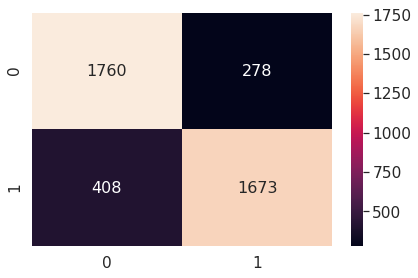

In [0]:
# Apply logistic regression
clf, proba_train, proba_test = apply_logistic_regression(clf, X_train, Y_train, X_test, Y_test)

### 3. Plot ROC curve

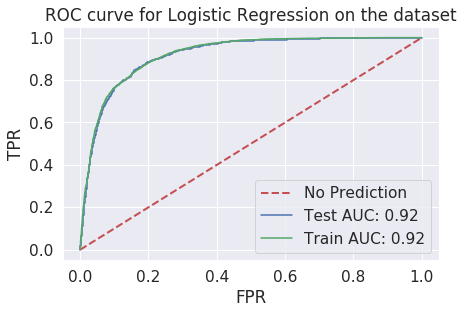

In [0]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, proba_test[:, 1])
test_auc = round(auc(fpr,tpr),2)
fpr_train, tpr_train, thresholds = roc_curve(Y_train, proba_train[:, 1])
train_auc = round(auc(fpr_train,tpr_train),2)
plot_roc_curve_for_test(fpr, tpr, fpr_train, tpr_train, 'ROC curve for Logistic Regression on the dataset', train_auc, test_auc)

##  Preprocessing Data

### 1. Preprocessing data for Random Forest

In [0]:
# Get the data
data = get_data('raw_data.pkl')

# Drop duplicate columns
data = data.drop_duplicates()

# Categorical Column
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
data_obj, data_num = divide_numerical_categorical(data, categorical_cols)

# Convert categorical data to numerical using onehot encoder
enc, data_obj_trans = apply_label_encoder(data_obj, categorical_cols)

# Covert categorical data to dataframe
data_obj = create_df_of_categorical_data(data_obj_trans, enc, 'label', categorical_cols)

# Recombine numerical and categorical data
data = recombine_categorical_numerical(data_num, data_obj)

# Seperate target variable
data, label = seperate_target_variable(data, 'Revenue')

# Covert target variable to numerical
label = convert_target_to_numerical(label, {True:1, False:0})

# Over sample data using SMOTE
X_res, Y_res = oversample_data(data, label)

# Standardize the data
standard_data = standardize_data(X_res)

# Split into train and test
X_train, X_test, Y_train, Y_test = split_train_test_data(standard_data, Y_res, 0.2)

##  Machine Learning Model (Random Forest)

### 1. Defining functions for machine learning model (Random Forest)

In [0]:
# Definign Hyper parameter tuning for Random Forest Model
def tuning_random_forest_model(estimators, max_depth_of_tree, cv_num, mectric, X_train, Y_train):
    parameter = {'n_estimators':estimators, 'max_depth':max_depth_of_tree}
    rfc = RandomForestClassifier()
    clf = GridSearchCV(rfc, parameter, cv=cv_num, scoring=mectric, n_jobs=-1)
    clf.fit(X_train, Y_train)
    return clf

# Apply Random Forest
def apply_random_forest(clf, X_train, Y_train, X_test, Y_test):
    rfc = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'])
    rfc.fit(X_train, Y_train)
    pred = rfc.predict(X_test)
    proba_train = rfc.predict_proba(X_train)
    proba_test = rfc.predict_proba(X_test)
    print("Accuracy of the prediction: {}%".format(round(accuracy_score(Y_test, pred)*100),3))
    print("Precision on test set: {}%".format(round(precision_score(Y_test, pred)*100),3))
    print("Recall on test set: {}%".format(round(recall_score(Y_test, pred)*100),3))
    df_cm = pd.DataFrame(confusion_matrix(Y_test, pred), range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    return rfc, proba_train, proba_test

# Define function to Plot the ROC curve
def plot_roc_curve_for_test(fpr, tpr,fpr_train, tpr_train, title, train_auc, test_auc):
    plt.title(title)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.plot(fpr, tpr, color='b')
    plt.plot(fpr_train, tpr_train, color='g')
    plt.legend(('No Prediction', 'Test AUC: '+str(test_auc), 'Train AUC: '+str(train_auc)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
# Define function for word cloud
def create_word_cloud(data,font_sz, fig_size):
    plt.figure(figsize=fig_size)

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=200,
            max_font_size=font_sz, 
            scale=3,
            random_state=1
        ).generate(str(data))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

### 2. Applying Random Forest model

In [0]:
# Define Hyper Parameter Values
max_depth_of_tree = [100,200,300,500,800,1000]
estimators = [40,60,80,100,120]

clf = tuning_random_forest_model(estimators, max_depth_of_tree, 10, 'roc_auc', X_train, Y_train)

In [0]:
# Save Random Forest GridSearchCv classifire
put_data(clf, 'rfc.pkl')

In [0]:
# Extract Random Forest GridSearchCv classifire
clf = get_data('rfc.pkl')

Accuracy of the prediction: 94.0%
Precision on test set: 93.0%
Recall on test set: 95.0%


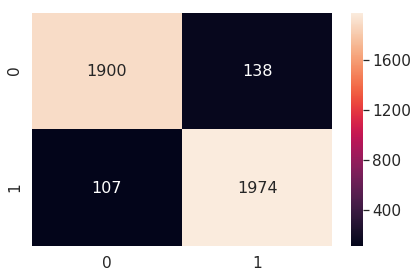

In [0]:
# Apply Random Forest classifier
clf, proba_train, proba_test = apply_random_forest(clf, X_train, Y_train, X_test, Y_test)

### 3. Plot ROC curve

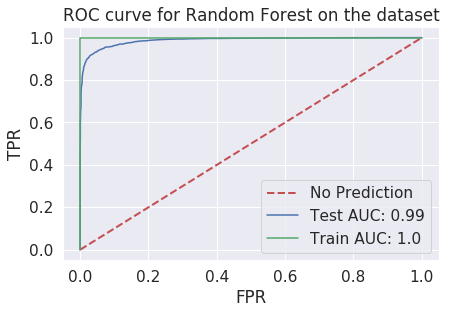

In [0]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, proba_test[:, 1])
test_auc = round(auc(fpr,tpr),2)
fpr_train, tpr_train, thresholds = roc_curve(Y_train, proba_train[:, 1])
train_auc = round(auc(fpr_train,tpr_train),2)
plot_roc_curve_for_test(fpr, tpr, fpr_train, tpr_train, 'ROC curve for Random Forest on the dataset', train_auc, test_auc)

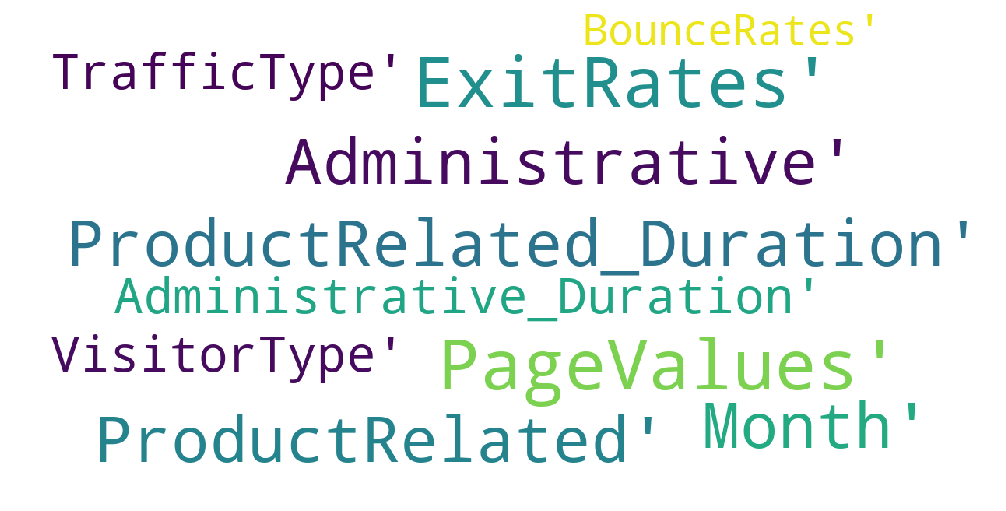

In [0]:
# Get the data
data_raw = get_data('raw_data.pkl')
cols = data_raw.columns.tolist()[:-1]
create_word_cloud(np.array(cols)[np.argsort(clf.feature_importances_)[::-1][:10]],30,(15,8))
del data_raw

## Ranking Customers based on their web foot prints

### 1. Preparing and preprocessing data

In [0]:
# Get the data
data = get_data('raw_data.pkl')

# Drop duplicate columns
data = data.drop_duplicates()

# Take the customers not purchaased anything (Revenue==FALSE)
data_false = data.loc[data['Revenue'] == False]

# Categorical Column
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
data_obj, data_num = divide_numerical_categorical(data_false, categorical_cols)

# Convert categorical data to numerical using onehot encoder
enc, data_obj_trans = apply_label_encoder(data_obj, categorical_cols)

# Covert categorical data to dataframe
data_obj = create_df_of_categorical_data(data_obj_trans, enc, 'label', categorical_cols)

# Recombine numerical and categorical data
data = recombine_categorical_numerical(data_num, data_obj)

# Seperate target variable
data, label = seperate_target_variable(data, 'Revenue')

# Covert target variable to numerical
label = convert_target_to_numerical(label, {True:1, False:0})


# Standardize the data
standard_data = standardize_data(data)

### 2. Rank Prediction function

In [0]:
# Assign rank to the persons having Revenue parameter False
def assign_rank(standard_data, data_false, clf):
    proba = clf.predict_proba(standard_data)
    proba_true = proba[:, 0]*100000

    # Unique score to get rank
    unique_true_decending = np.sort(np.unique(proba_true))[::-1].tolist()

    # Assigning rank
    rank_dict = {}
    rank = 1
    for i in unique_true_decending:
    rank_dict[i] = rank
    rank += 1

    a = np.array([rank_dict[i] for i in proba_true])
    data_false['Rank'] = a

    return data_false

In [0]:
ranked_data = assign_rank(standard_data, data_false, clf)

In [0]:
ranked_data.sort_values('Rank', inplace=True)
ranked_data.to_csv(data_path+'ranked_data.csv', index=False)

In [0]:
###########
1. logistic regression without smot
2. precession recall curve
3. TSNE